In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
xgboost = pd.read_csv("./metrics/033_xgboost.csv.zip")
decision_tree = pd.read_csv("./metrics/033_decision_tree.csv.zip")
random_forest = pd.read_csv("./metrics/033_random_forest.csv.zip")
mlp = pd.read_csv("./metrics/033_mlpr.csv.zip")

In [3]:
metrics = pd.concat([xgboost,decision_tree,random_forest,mlp])

In [4]:
metrics.sort_values("r2",ascending=False,inplace=True)

In [5]:
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.943887,18.461560,843.596250,29.044730,0.058842,1.138212,0.015431
0,Random Forest,0.927614,24.468158,1088.250720,32.988645,0.080950,1.044862,0.033527
0,Decision Tree,0.877472,28.726245,1842.081181,42.919473,0.094324,0.031469,0.004690
0,MLP,0.746877,45.296814,3805.433600,61.688198,0.147151,15.321533,0.006544


In [6]:
metrics.to_csv("./metrics/034_best_metrics.csv.zip",index=False,compression="zip")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


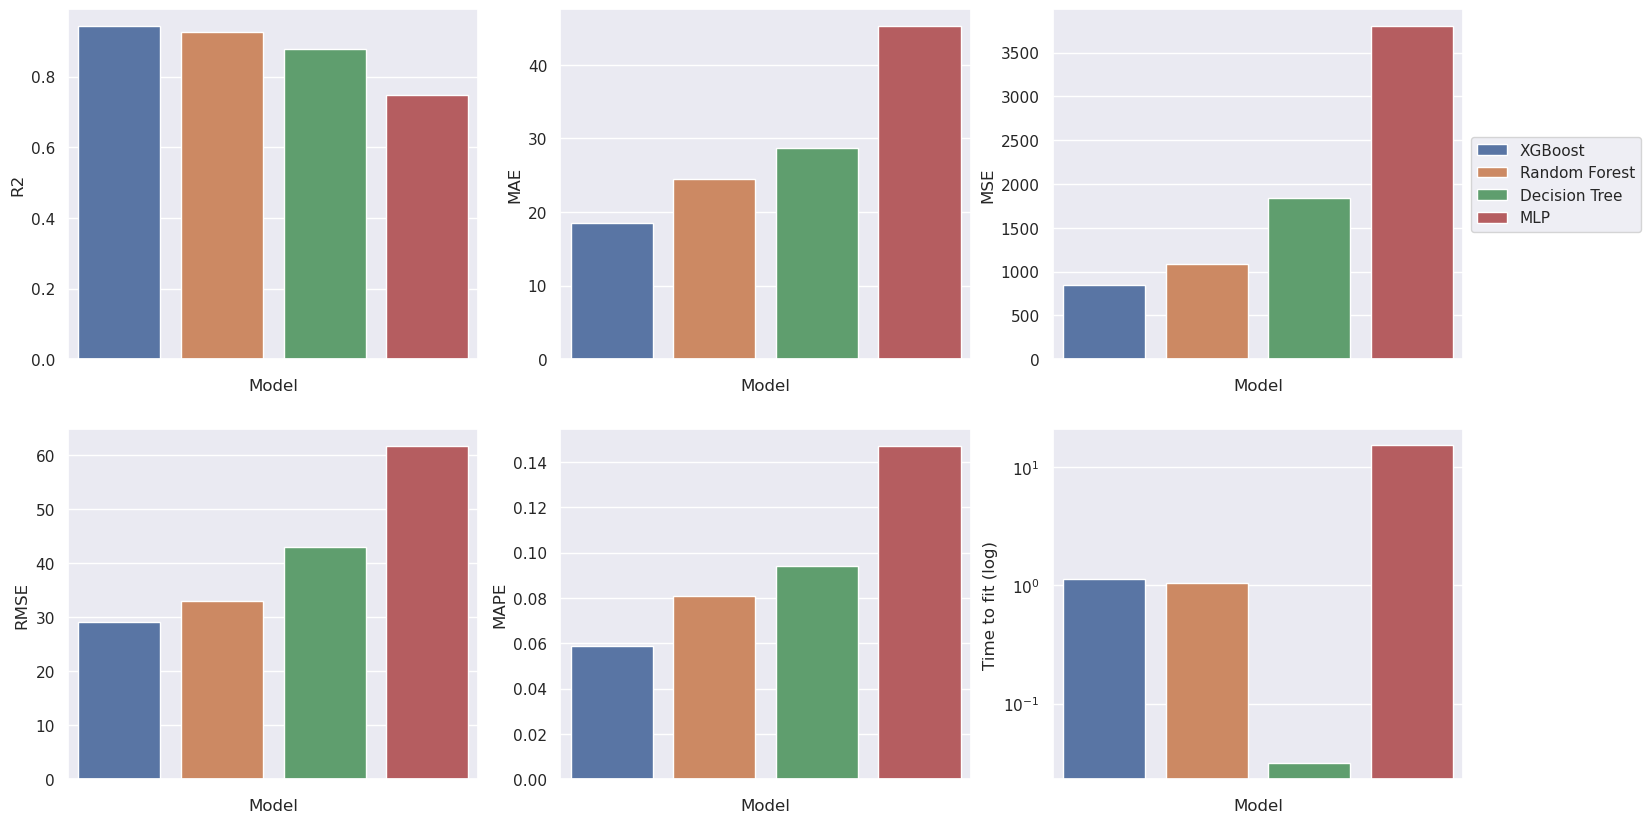

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)",yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/034_gardiner_count_only_best_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/034_gardiner_count_only_best_metrics.png",bbox_inches="tight")